## Basic Model

We need a basic proof-of-concept that shows learning progress on our training set.

In [1]:
from fastai.vision import Path, open_image, ImageBBox
import os
import collections

In [2]:
DATA = Path('data/')
IMAGES = DATA/'train_labelled_images'
ANNOTATIONS = DATA/'train_labelled_annotations'

In [3]:
def get_annotations_from_path(folderPath, prefix=None):
    "Open the files in folder `folderPath` and returns the lists of filenames (with maybe `prefix`) and labelled bboxes."
    filePaths = os.listdir(folderPath)     
    id2images, id2bboxes, id2cats = {}, collections.defaultdict(list), collections.defaultdict(list)
    classes = {}
    
    sorghumHeadCategory = 0
    
    for path in filePaths:
        fullPath = folderPath/path
        id = path.replace('.txt', '.jpeg')
        
        with open(fullPath, 'r') as f:
            for line in f:
                
                splitLines = line.split(' ')
                
                left = int(splitLines[1])
                top = int(splitLines[2])
                right = int(splitLines[3])
                bottom = int(splitLines[4].strip())
               
                #Coco format: "bbox" : [x,y,width,height]
                #Converted "bbox" : [left,top,width,height]
                #id2bboxes[o['image_id']].append([bb[1],bb[0], bb[3]+bb[1], bb[2]+bb[0]])

                id2bboxes[id].append([top, left, bottom, right])
                id2cats[id].append(sorghumHeadCategory)
               
            id2images[id] = IMAGES/id

    #Set up classes mapping from id to classname
    classes[sorghumHeadCategory] = 'sorghumHead'
                   
    ids = list(id2images.keys())
    return [id2images[k] for k in ids], [[id2bboxes[k], id2cats[k]] for k in ids]

In [4]:
images, lbl_bbox = get_annotations_from_path(ANNOTATIONS)

In [5]:
len(lbl_bbox[0][0])

103

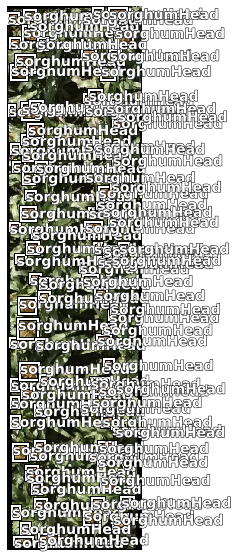

In [7]:
img = open_image(images[0])
bullshit = [0 for _ in range(len(lbl_bbox[0][0]))]
bbox = ImageBBox.create(*img.size, lbl_bbox[0][0], bullshit, classes=['sorghumHead'])
img.show(figsize=(15,10), y=bbox)